# Introduction to K-Means++
The K-Means clustering algorithm is more than half a century old, but it is not falling out of fashion; it is still the most popular clustering algorithm for Machine Learning.

However, there can be some problems with its first step. In the traditional K-Means algorithms, the starting postitions of the centroids are intialized completely randomly. This can result in suboptimal clusters.

In this lesson, we will go over another version of K-Means, known as the K-Means++ algorithm. K-Means++ changes the way centroids are initalized to try to fix this problem.

The inertia of model that randomly initialized centroids is 171.81270859126667
The inertia of model that initialized the centroids using KMeans++ is 171.8121038792753


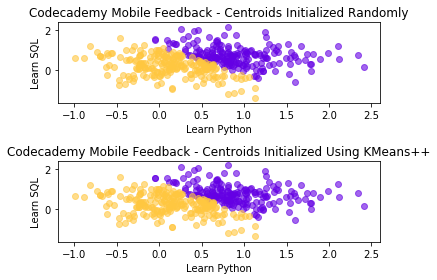

In [7]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import random
import timeit

mu = 1
std = 0.5

np.random.seed(100)

xs = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.75,std,100)), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100))

ys = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100)), np.random.normal(0.75,std,100))

values = list(zip(xs, ys))



model = KMeans(init='random', n_clusters=2)
results = model.fit_predict(values)
print("The inertia of model that randomly initialized centroids is " + str(model.inertia_))



colors = ['#6400e4', '#ffc740']
plt.subplot(211)
for i in range(2):
  points = np.array([values[j] for j in range(len(values)) if results[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.6)

plt.title('Codecademy Mobile Feedback - Centroids Initialized Randomly')

plt.xlabel('Learn Python')
plt.ylabel('Learn SQL')

plt.subplot(212)
model = KMeans( n_clusters=2)
results = model.fit_predict(values)
print("The inertia of model that initialized the centroids using KMeans++ is " + str(model.inertia_))



colors = ['#6400e4', '#ffc740']

for i in range(2):
  points = np.array([values[j] for j in range(len(values)) if results[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.6)

plt.title('Codecademy Mobile Feedback - Centroids Initialized Using KMeans++')

plt.xlabel('Learn Python')
plt.ylabel('Learn SQL')

plt.tight_layout()
plt.show()


The only difference between each algorithm is how the cluster centroids are initialized.

It’s hard to see, but the clusters are different. Look at the point at x=0.2 and y=1. On the top graph you should see a purple point, but on the bottom graph a yellow point.

Which one of these clusters is better? We have printed the model of each inertia in the workspace. The model with the lower inertia has more coherent clusters. You can think of the model with the lower inertia as being “better”.

Which model performs better clustering?

Continue to the next exercise to see why random initialization of centroids can result in poorer clusters.

# Poor Clustering
Suppose we have four data samples that form a rectangle whose width is greater than its height:

<img src="images/no_clusters.png" width=400 height=300 />
Data Points in Rectangle Shape

If you wanted to find two clusters (k = 2) in the data, which points would you cluster together? You might guess the points that align vertically cluster together, since the height of the rectangle is smaller than its width. We end up with a left cluster (purple points) and a right cluster (yellow points).

<img src="images/correct.png" width=400 height=300 />
Optimal Cluster
Let’s say we use the regular K-Means algorithm to cluster the points, where the cluster centroids are initialized randomly. We get unlucky and those randomly initialized cluster centroids happen to be the midpoints of the top and bottom line segments of the rectangle formed by the four data points.

<img src="images/poor_cluster.png" width=400 height=300 />
Random Centroid Placement

The algorithm would converge immediately, without moving the cluster centroids. Consequently, the two top data points are clustered together (yellow points) and the two bottom data points are clustered together (purple points).

<img src="images/final_cluster.png" width=400 height=300 />
Suboptimal Clusters

This is a suboptimal clustering because the width of the rectangle is greater than its height. The optimal clusters would be the two left points as one cluster and the two right points as one cluster, as we thought earlier.

# Instructions
1.
Suppose we have four data samples with these values:

(1, 1)
(1, 3)
(4, 1)
(4, 3)
And suppose we perform K-means on this data where the k is 2 and the randomized 2 initial centroids are located at the following positions:

(2.5, 1)
(2.5, 3)
What do you think the result clusters would look like?

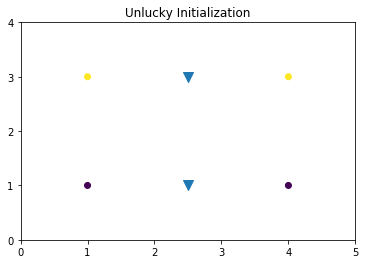

In [8]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy
from sklearn.cluster import KMeans 

x = [1, 1, 4, 4]
y = [1, 3, 1, 3]

values = np.array(list(zip(x, y)))

centroids_x = [2.5, 2.5]
centroids_y = [1, 3]

centroids = np.array(list(zip(centroids_x, centroids_y)))

model = KMeans(init=centroids, n_clusters=2)

# Initial centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)

results = model.fit_predict(values)

plt.scatter(x, y, c=results, alpha=1)

# Cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='v', s=100)

ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_yticks([0, 1, 2, 3, 4])

plt.title('Unlucky Initialization')
plt.show()


# What is K-Means++?
To recap, the Step 1 of the K-Means algorithm is “Place k random centroids for the initial clusters”.

The K-Means++ algorithm replaces Step 1 of the K-Means algorithm and adds the following:

1.1 The first cluster centroid is randomly picked from the data points.

1.2 For each remaining data point, the distance from the point to its nearest cluster centroid is calculated.

1.3 The next cluster centroid is picked according to a probability proportional to the distance of each point to its 
nearest cluster centroid. This makes it likely for the next cluster centroid to be far away from the already initialized centroids.

Repeat 1.2 - 1.3 until k centroids are chosen.

# K-Means++ using Scikit-Learn

Using the scikit-learn library and its cluster module , you can use the KMeans() method to build an original K-Means model that finds 6 clusters like so:

    model = KMeans(n_clusters=6, init='random')
    
The init parameter is used to specify the initialization and init='random' specifies that initial centroids are chosen as random (the original K-Means).

But how do you implement K-Means++?

There are two ways and they both require little change to the syntax:

Option 1: You can adjust the parameter to init='k-means++'.

    test = KMeans(n_clusters=6, init='k-means++')
Option 2: Simply drop the parameter.

    test = KMeans(n_clusters=6)
This is because that init=k-means++ is actually default in scikit-learn.

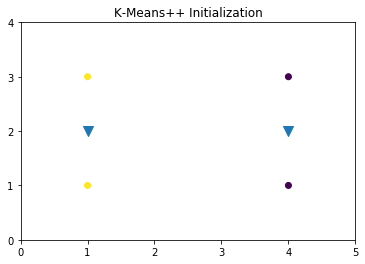

The model's inertia is 4.0


In [9]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy
from sklearn.cluster import KMeans 

x = [1, 1, 4, 4]
y = [1, 3, 1, 3]

values = np.array(list(zip(x, y)))

centroids_x = [2.5, 2.5]
centroids_y = [1, 3]

centroids = np.array(list(zip(centroids_x, centroids_y)))

model = KMeans(init="k-means++", n_clusters=2)
# Initial centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)

results = model.fit_predict(values)

plt.scatter(x, y, c=results, alpha=1)

# Cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='v', s=100)

ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_yticks([0, 1, 2, 3, 4])

plt.title('K-Means++ Initialization')
plt.show()
print("The model's inertia is " + str(model.inertia_))

# Review
Congratulations, now your K-Means model is improved and ready to go!

K-Means++ improves K-Means by placing initial centroids more strategically. As a result, it can result in more optimal clusterings than K-Means.

It can also outperform K-Means in speed. If you get very unlucky initial centroids using K-Means, the algorithm can take a long time to converge. K-Means++ will often converge quicker!

You can implement K-Means++ with the scikit-learn library similar to how you implement K-Means.

The KMeans() function has an init parameter, which specifies the method for initialization:

'random'
'k-means++'
Note: scikit-learn’s KMeans() uses 'k-means++' by default, but it is a good idea to be explicit!

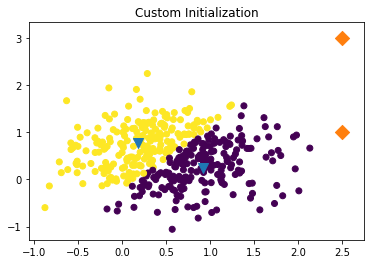

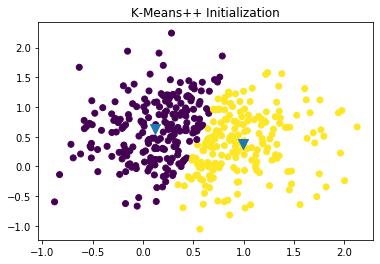

The custom model's inertia is 158.34776707144428
The K-means++ model's inertia is 157.5233751592371


In [10]:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy
from sklearn.cluster import KMeans

std = 0.5

x = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.75,std,100)), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100))

y = np.append(np.append(np.append(np.random.normal(0.25,std,100), np.random.normal(0.25,std,100)), np.random.normal(0.75,std,100)), np.random.normal(0.75,std,100))

values = np.array(list(zip(x, y)))

centroids_x = [2.5, 2.5]
centroids_y = [1, 3]

centroids = np.array(list(zip(centroids_x, centroids_y)))

model_custom = KMeans(init=centroids, n_clusters=2)
results_custom = model_custom.fit_predict(values)

model = KMeans(init='k-means++', n_clusters=2)
results = model.fit_predict(values)

plt.scatter(x, y, c=results_custom, alpha=1)
plt.scatter(model_custom.cluster_centers_[:, 0], model_custom.cluster_centers_[:, 1], marker='v', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=100)
plt.title('Custom Initialization')
plt.show()
plt.cla()

plt.scatter(x, y, c=results, alpha=1)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='v', s=100)
plt.title('K-Means++ Initialization')
plt.show()

print("The custom model's inertia is " + str(model_custom.inertia_))
print("The K-means++ model's inertia is " + str(model.inertia_))


The code in the workspace performs two clusterings on Codecademy learner data using K-Means. The first algorithm initializes the centroids at the x positions given on line 12 and the y positions given on line 13. The second algorithm initializes the centroids according to the K-Means++ algorithm.

Try changing the positions at which the centroids are initialized on lines 12 and 13. How does changing the initialization position affect the final clustering? And how does the first clustering compare to the K-Means++ clustering?